# CMPE 257: Machine Learning

## ***Team Spartans:***

**- Pramatha Nadig**

**- Jack Kalavadia**

**- Rutvik Moradiya**

**- Rishikesh Andhare**




### Loading the Dataset

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

pd.options.display.max_columns = None

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

import pydotplus
from IPython.display import Image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

from collections import Counter


In [64]:
url1 = 'https://drive.google.com/file/d/1RgblS03vPiX3csMFjE58dZAQ1exG9iBC/view?usp=drive_link'
url1 ='https://drive.google.com/uc?id=' + url1.split('/')[-2]
data1 = pd.read_csv(url1)
data1.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.240000,0.257600,0.750000,0.089600,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.220000,0.272700,0.800000,0.000000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.200000,0.257600,0.860000,0.000000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.240000,0.287900,0.750000,0.000000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.320000,0.348500,0.760000,0.000000,8,6,14


In [65]:
datasetUrl2 = 'https://drive.google.com/file/d/1w8kQtLv3vQEzB4FprLoP28yvpDTyB5SC'
datasetUrl2 ='https://drive.google.com/uc?id=' + datasetUrl2.split('/')[-1]
data2 = pd.read_csv(datasetUrl2, encoding_errors='ignore')
data2.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.400000,37,1.500000,2000,-18.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.600000,35,1.300000,2000,-19.500000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.400000,38,0.900000,2000,-19.300000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.600000,37,1.100000,2000,-19.800000,0.010000,0.000000,0.000000,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.500000,27,0.500000,1928,-22.400000,0.230000,0.000000,0.000000,Winter,No Holiday,Yes


In [66]:
data2['Date'] = pd.to_datetime(data2['Date'], format='%d/%m/%Y')

In [67]:
data2['Date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
5      2017-12-01
6      2017-12-01
7      2017-12-01
8      2017-12-01
9      2017-12-01
10     2017-12-01
11     2017-12-01
12     2017-12-01
13     2017-12-01
14     2017-12-01
15     2017-12-01
16     2017-12-01
17     2017-12-01
18     2017-12-01
19     2017-12-01
20     2017-12-01
21     2017-12-01
22     2017-12-01
23     2017-12-01
24     2017-12-02
25     2017-12-02
26     2017-12-02
27     2017-12-02
28     2017-12-02
29     2017-12-02
30     2017-12-02
31     2017-12-02
32     2017-12-02
33     2017-12-02
34     2017-12-02
35     2017-12-02
36     2017-12-02
37     2017-12-02
38     2017-12-02
39     2017-12-02
40     2017-12-02
41     2017-12-02
42     2017-12-02
43     2017-12-02
44     2017-12-02
45     2017-12-02
46     2017-12-02
47     2017-12-02
48     2017-12-03
49     2017-12-03
50     2017-12-03
51     2017-12-03
52     2017-12-03
53     2017-12-03
54     2017-12-03
55     201

In [68]:
df_x = data2.loc[:, data2.columns != 'Rented Bike Count']
df_y = data2['Rented Bike Count']
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=12)

#eda

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url2 = 'https://drive.google.com/file/d/1w8kQtLv3vQEzB4FprLoP28yvpDTyB5SC/view'
url2 = 'https://drive.google.com/uc?id=' + url2.split('/')[-2]
data2 = pd.read_csv(url2, encoding='ISO-8859-1')


Basic Statistics

In [ ]:
data2.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


Distribution of Rented Bike Count

<ipython-input-14-5cf971f5d836>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inspection_data['Rented Bike Count'], kde=False, bins=50)


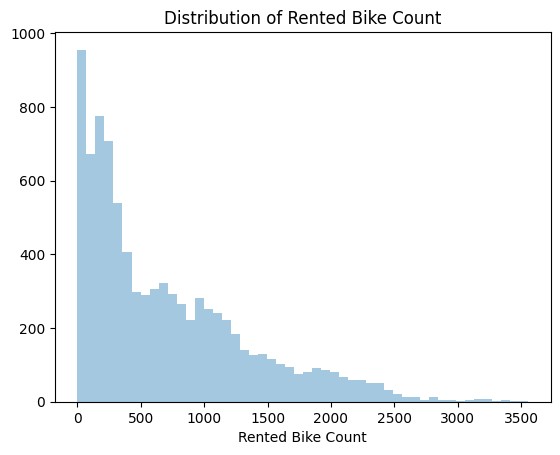

In [ ]:

sns.distplot(data2['Rented Bike Count'], kde=False, bins=50)
plt.title('Distribution of Rented Bike Count')
plt.show()


Bike Rentals by Hour

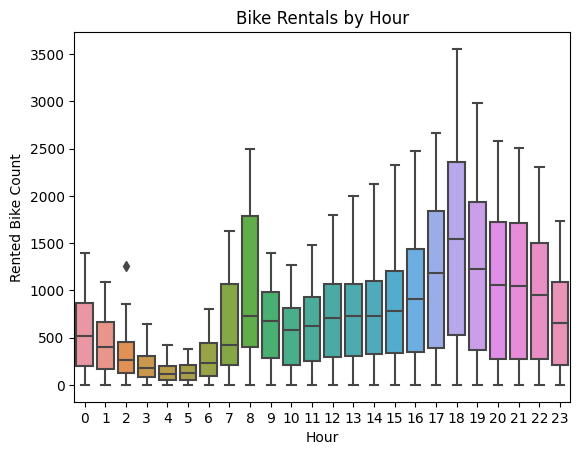

In [ ]:

sns.boxplot(x='Hour', y='Rented Bike Count', data=data2)
plt.title('Bike Rentals by Hour')
plt.show()


Bike Rentals by Seasons

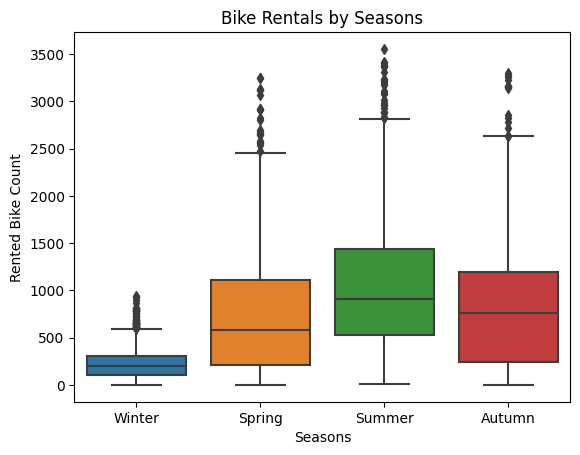

In [ ]:

sns.boxplot(x='Seasons', y='Rented Bike Count', data=data2)
plt.title('Bike Rentals by Seasons')
plt.show()


Correlation Heatmap

<ipython-input-17-5d41b34fc087>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = inspection_data.corr()


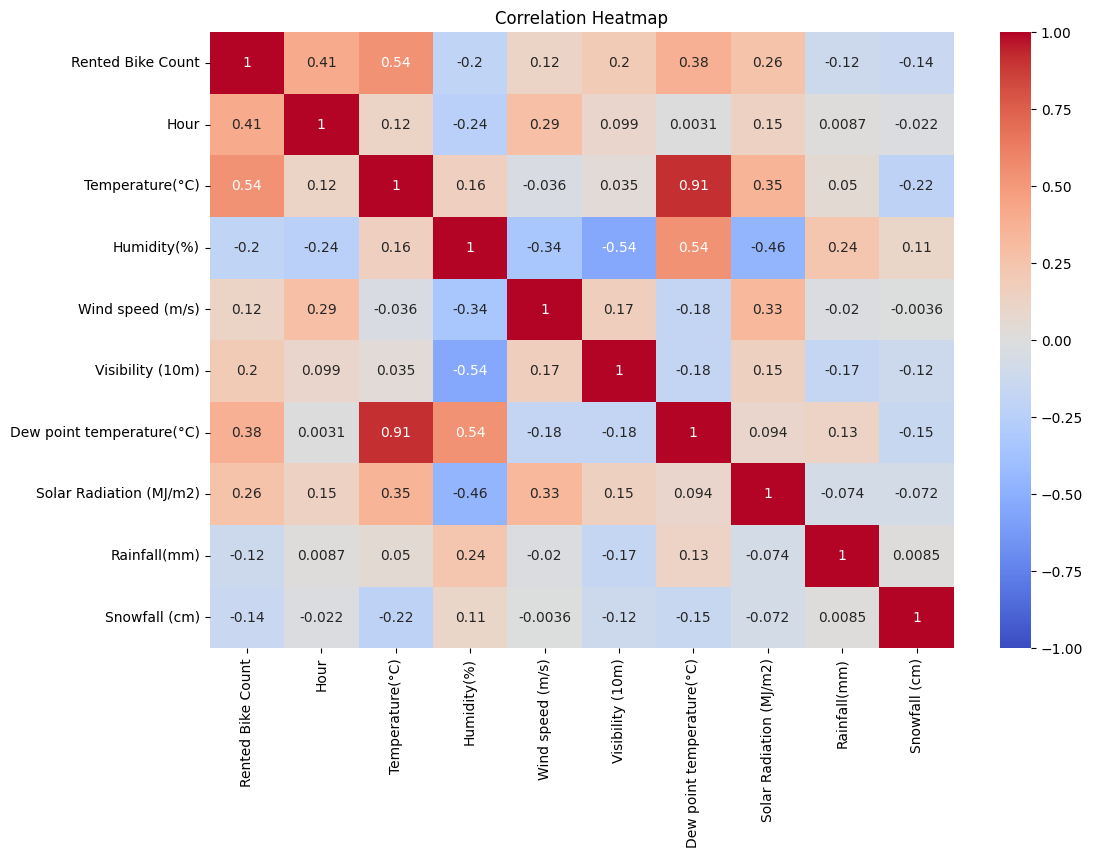

In [ ]:

correlation_matrix = data2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


#eda2

In [ ]:
url1 = 'https://drive.google.com/file/d/1RgblS03vPiX3csMFjE58dZAQ1exG9iBC/view'
url1 ='https://drive.google.com/uc?id=' + url1.split('/')[-2]
data1 = pd.read_csv(url1)
data1.head(10)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Initial Data Exploration

In [ ]:

# Check for missing values
missing_values = data.isnull().sum()

# Check for unique values in categorical columns
unique_values = {
    "season": data1['season'].unique(),
    "yr": data1['yr'].unique(),
    "mnth": data1['mnth'].unique(),
    "hr": data1['hr'].unique(),
    "holiday": data1['holiday'].unique(),
    "weekday": data1['weekday'].unique(),
    "workingday": data1['workingday'].unique(),
    "weathersit": data1['weathersit'].unique()
}
missing_values, unique_values


(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 {'season': array([1, 2, 3, 4]),
  'yr': array([0, 1]),
  'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
  'hr': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23]),
  'holiday': array([0, 1]),
  'weekday': array([6, 0, 1, 2, 3, 4, 5]),
  'workingday': array([0, 1]),
  'weathersit': array([1, 2, 3, 4])})

Visualizations

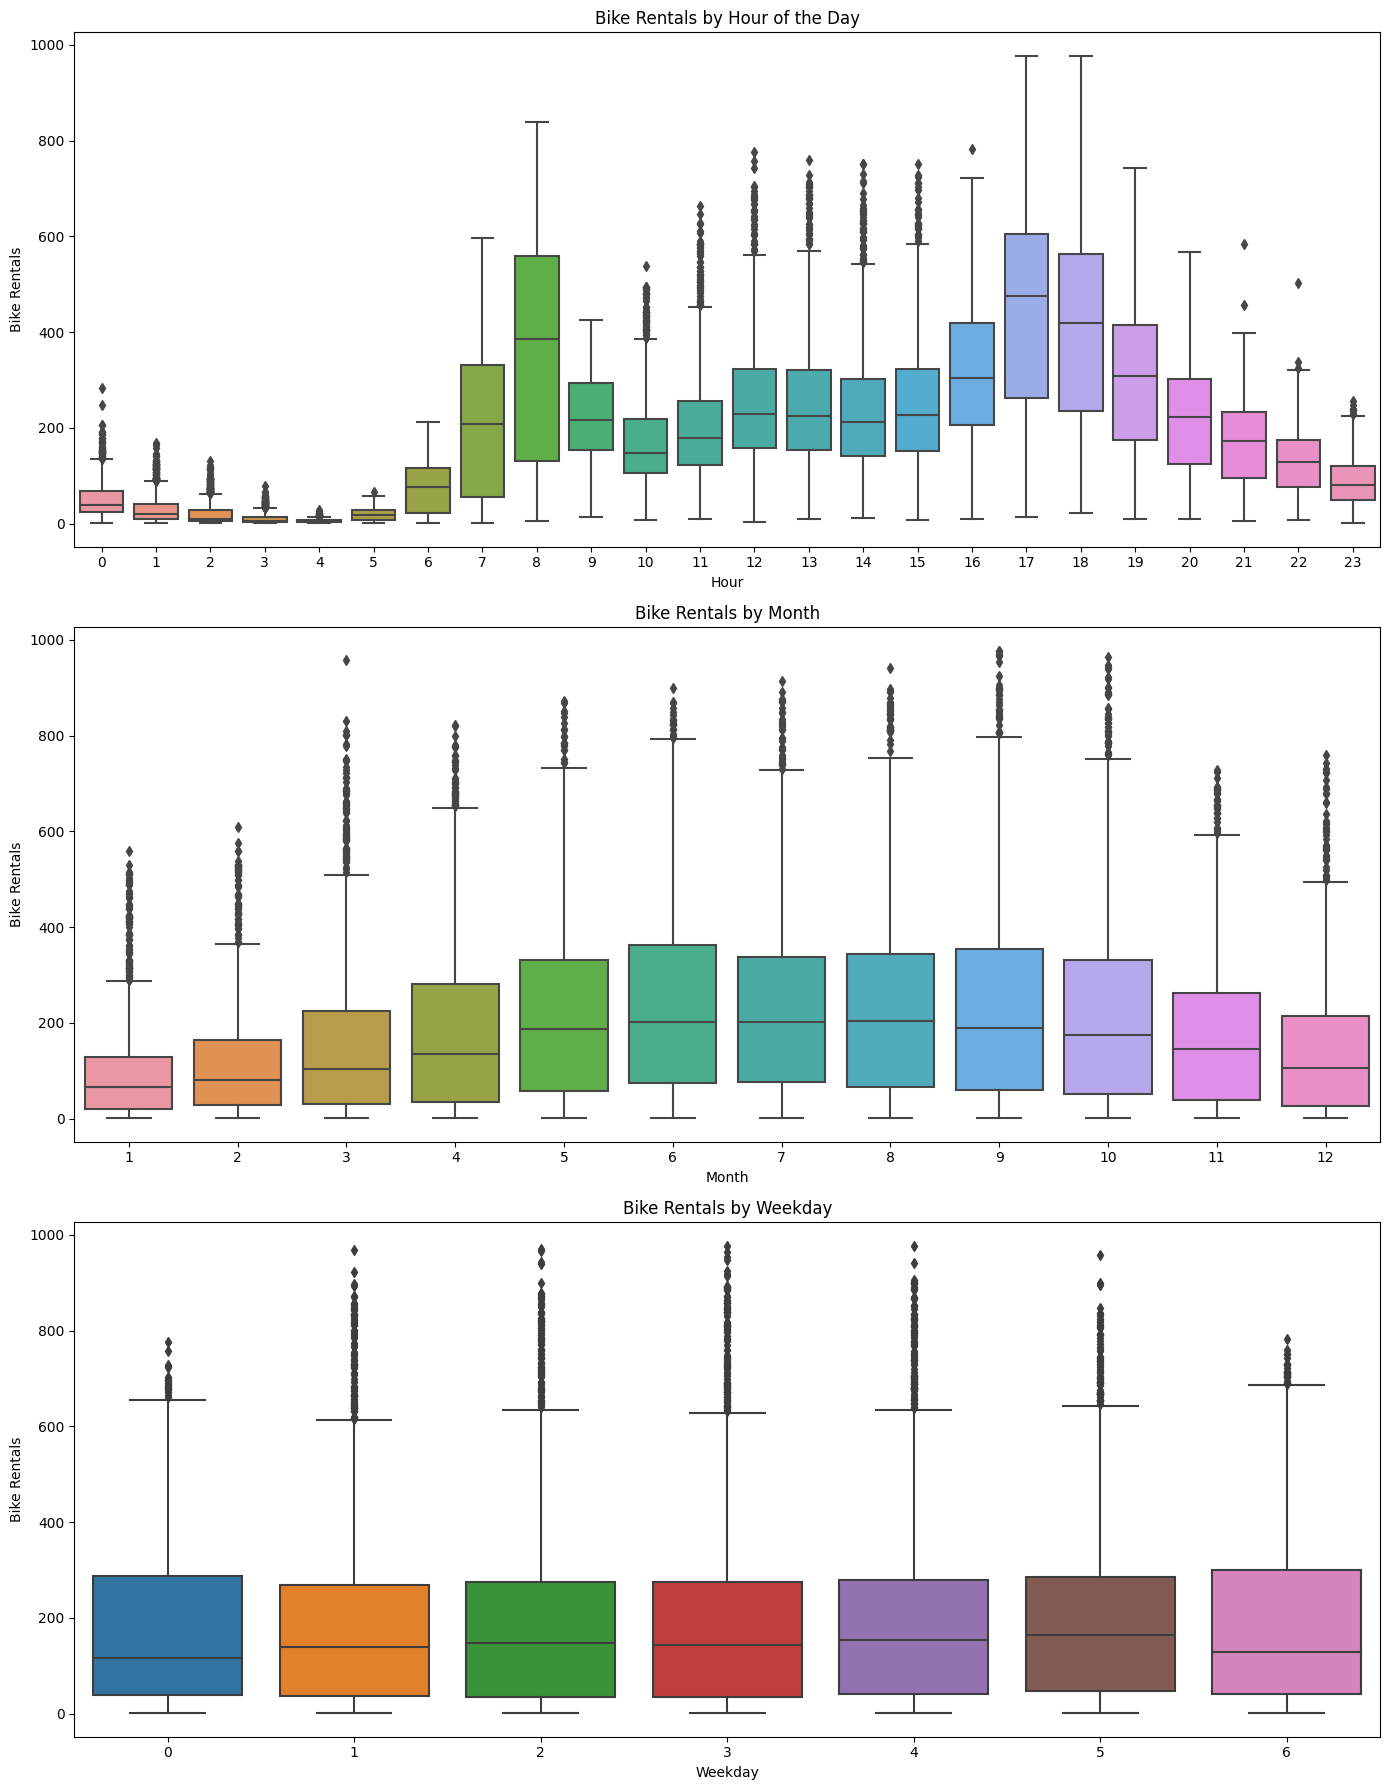

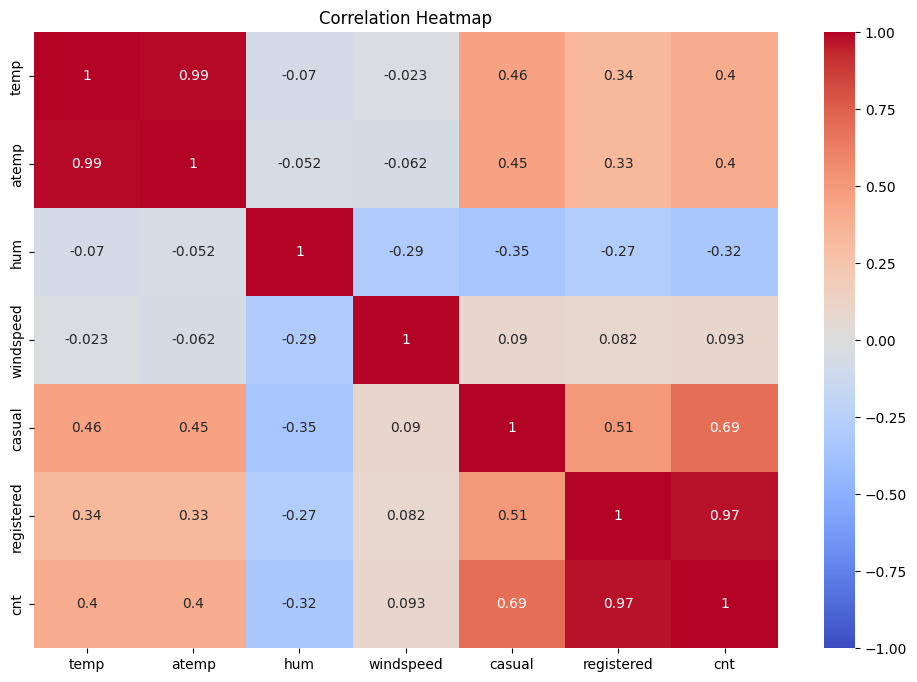

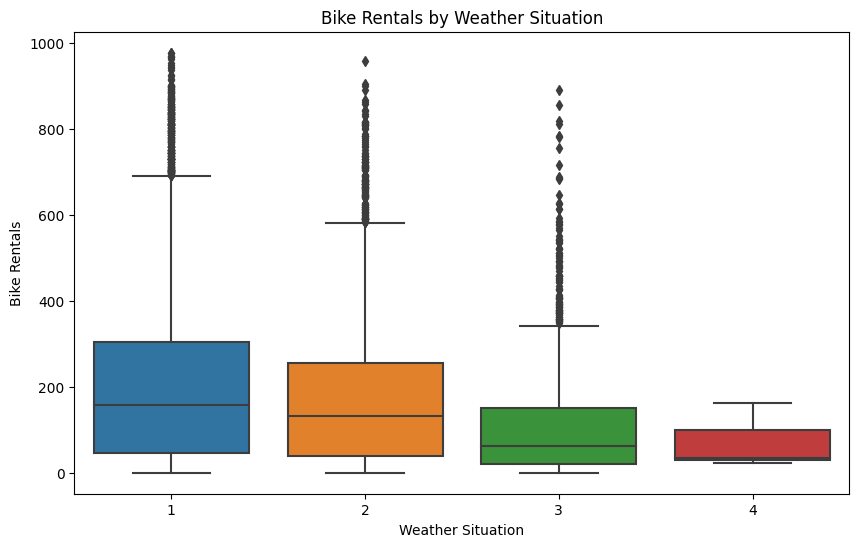

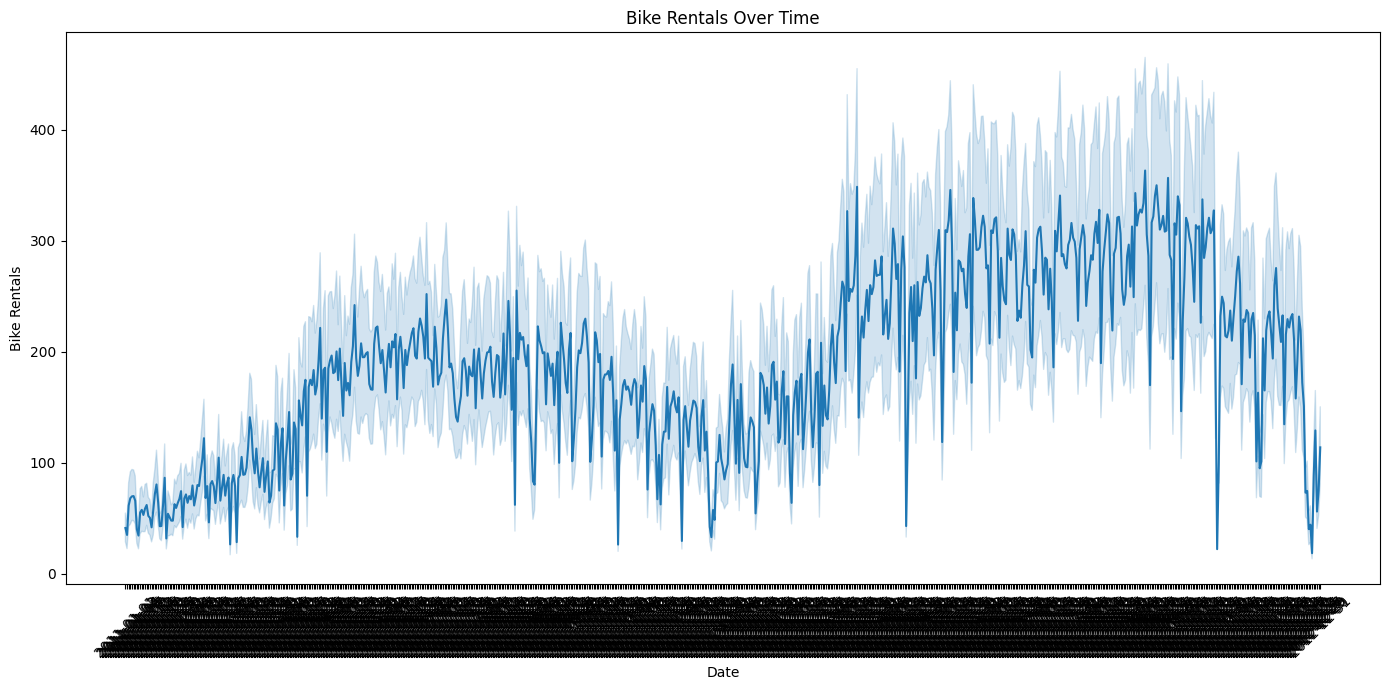

In [ ]:

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Distribution of bike rentals across hours of the day
sns.boxplot(x='hr', y='cnt', data=data1, ax=ax[0])
ax[0].set_title('Bike Rentals by Hour of the Day')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Bike Rentals')

# Distribution of bike rentals across months
sns.boxplot(x='mnth', y='cnt', data=data1, ax=ax[1])
ax[1].set_title('Bike Rentals by Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Bike Rentals')

# Distribution of bike rentals across weekdays
sns.boxplot(x='weekday', y='cnt', data=data1, ax=ax[2])
ax[2].set_title('Bike Rentals by Weekday')
ax[2].set_xlabel('Weekday')
ax[2].set_ylabel('Bike Rentals')

plt.tight_layout()
plt.show()

# Correlation heatmap
correlation_matrix = data1[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Bike rentals by weather situation
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data1)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Bike Rentals')
plt.show()

# Static visualization of bike rentals over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='dteday', y='cnt', data=data1)
plt.title('Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Bike Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Preparation and wrangling

In [ ]:
data1.workingday.replace( (1, 0),('Yes', 'No'), inplace=True)

In [ ]:
data2.holiday.replace(('Holiday', 'No Holiday'), (1, 0), inplace=True)

In [ ]:
data1.season.replace( (1,2,3,4),('Winter', 'Autumn','Summer','Spring'), inplace=True)

In [ ]:
data2.head()

,dteday,cnt,hr,temp,hum,windspeed,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm),season,holiday,workingday
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,0,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,0,Yes


In [ ]:
data1=data1.drop(['instant'],axis=1)

In [ ]:
data1.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,0,1,0,0,6,No,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2011-01-01,Winter,0,1,1,0,6,No,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,2011-01-01,Winter,0,1,2,0,6,No,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,2011-01-01,Winter,0,1,3,0,6,No,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,2011-01-01,Winter,0,1,4,0,6,No,1,0.240000,0.287900,0.750000,0.000000,0,1,1


In [ ]:
data2.head()

,dteday,cnt,hr,temp,hum,windspeed,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm),season,holiday,workingday
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,0,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,0,Yes


In [ ]:
data1.dteday.head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object

In [ ]:
pd.to_datetime(data1.dteday.head()).dt.month,
pd.to_datetime(data1.dteday.head()).dt.day,
pd.to_datetime(data1.dteday.head()).dt.year

0    2011
1    2011
2    2011
3    2011
4    2011
Name: dteday, dtype: int64

In [ ]:
data2.head()

,dteday,cnt,hr,temp,hum,windspeed,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm),season,holiday,workingday
0,01/12/2017,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
1,01/12/2017,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
2,01/12/2017,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,0,Yes
3,01/12/2017,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,0,Yes
4,01/12/2017,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,0,Yes


In [ ]:
df = data1.merge(data2, on = ['cnt','hr','temp','hum','windspeed','dteday','holiday','workingday','season'], how = 'outer')

In [ ]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Visibility (10m),Dew point temperature(C),solarRadiation,Rainfall(mm),Snowfall (cm)
0,2011-01-01,Winter,0.000000,1.000000,0,0,6.000000,No,1.000000,0.240000,0.287900,0.810000,0.000000,3.000000,13.000000,16,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,Winter,0.000000,1.000000,1,0,6.000000,No,1.000000,0.220000,0.272700,0.800000,0.000000,8.000000,32.000000,40,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,Winter,0.000000,1.000000,2,0,6.000000,No,1.000000,0.220000,0.272700,0.800000,0.000000,5.000000,27.000000,32,NaN,NaN,NaN,NaN,NaN
3,2011-01-01,Winter,0.000000,1.000000,3,0,6.000000,No,1.000000,0.240000,0.287900,0.750000,0.000000,3.000000,10.000000,13,NaN,NaN,NaN,NaN,NaN
4,2011-01-01,Winter,0.000000,1.000000,4,0,6.000000,No,1.000000,0.240000,0.287900,0.750000,0.000000,0.000000,1.000000,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.drop(['registered','atemp','yr','mnth','weekday','Visibility (10m)','Dew point temperature(C)','solarRadiation','Snowfall (cm)','Rainfall(mm)','casual','weathersit'],axis=1)

In [ ]:
df.head()

,dteday,season,hr,holiday,workingday,temp,hum,windspeed,cnt
0,2011-01-01,Winter,0,0,No,0.240000,0.810000,0.000000,16
1,2011-01-01,Winter,1,0,No,0.220000,0.800000,0.000000,40
2,2011-01-01,Winter,2,0,No,0.220000,0.800000,0.000000,32
3,2011-01-01,Winter,3,0,No,0.240000,0.750000,0.000000,13
4,2011-01-01,Winter,4,0,No,0.240000,0.750000,0.000000,1


In [ ]:
pd.to_datetime(data1.dteday.head()).dt.month,
pd.to_datetime(data1.dteday.head()).dt.day,
pd.to_datetime(data1.dteday.head()).dt.year

0    2011
1    2011
2    2011
3    2011
4    2011
Name: dteday, dtype: int64

In [ ]:
df["month"]=pd.to_datetime(df.dteday).dt.month

In [ ]:
df["day"]=pd.to_datetime(df.dteday).dt.day
df["year"]=pd.to_datetime(df.dteday).dt.year

In [ ]:
df.head()

,dteday,season,hr,holiday,workingday,temp,hum,windspeed,cnt,month,day,year
0,2011-01-01,Winter,0,0,No,0.240000,0.810000,0.000000,16,1,1,2011
1,2011-01-01,Winter,1,0,No,0.220000,0.800000,0.000000,40,1,1,2011
2,2011-01-01,Winter,2,0,No,0.220000,0.800000,0.000000,32,1,1,2011
3,2011-01-01,Winter,3,0,No,0.240000,0.750000,0.000000,13,1,1,2011
4,2011-01-01,Winter,4,0,No,0.240000,0.750000,0.000000,1,1,1,2011


In [ ]:
df=df.drop(['dteday'],axis=1)

In [ ]:
df.dtypes

season         object
hr              int64
holiday         int64
workingday     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
month           int64
day             int64
year            int64
dtype: object

In [ ]:
df.to_csv("dataset3.csv",index=False)

## Remove Insignificant variables

In [ ]:
df_cat = df.select_dtypes(include=[np.object])
df_cat.head()

,season,workingday
0,Winter,No
1,Winter,No
2,Winter,No
3,Winter,No
4,Winter,No


In [ ]:
cols = list(df.columns)

<Axes: xlabel='workingday', ylabel='count'>

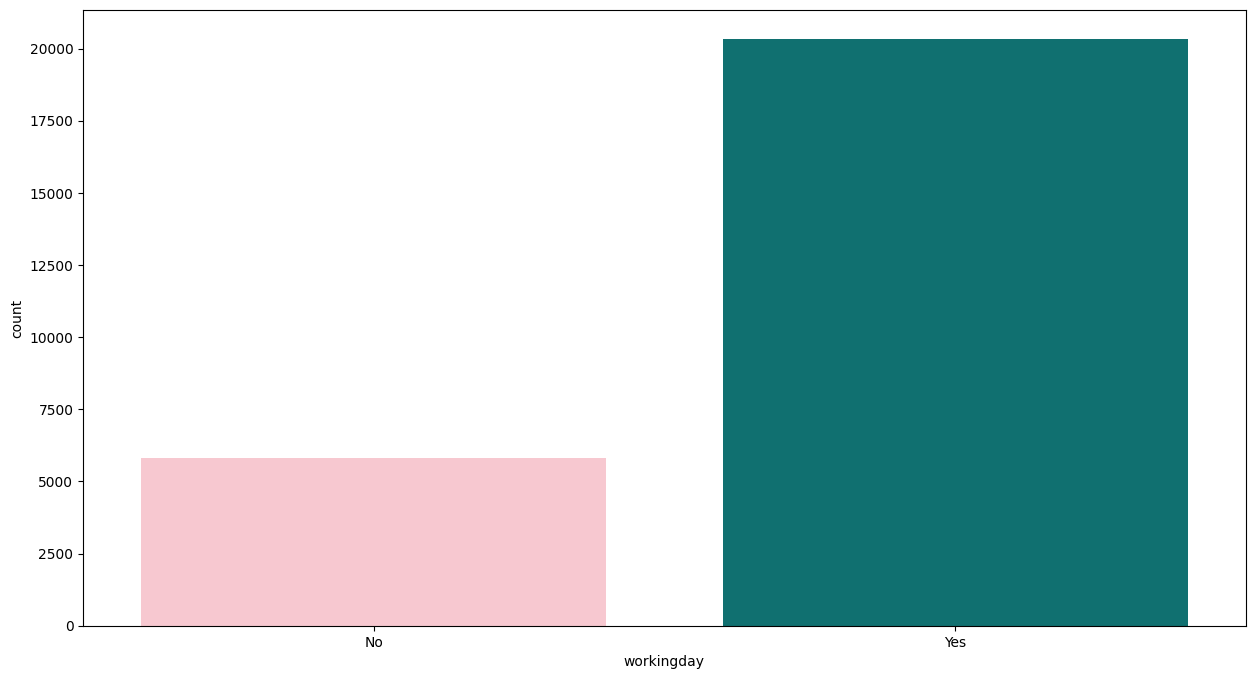

In [ ]:
sns.countplot(x='workingday',data=df_cat, palette =['pink', 'teal'])

<Axes: xlabel='season', ylabel='count'>

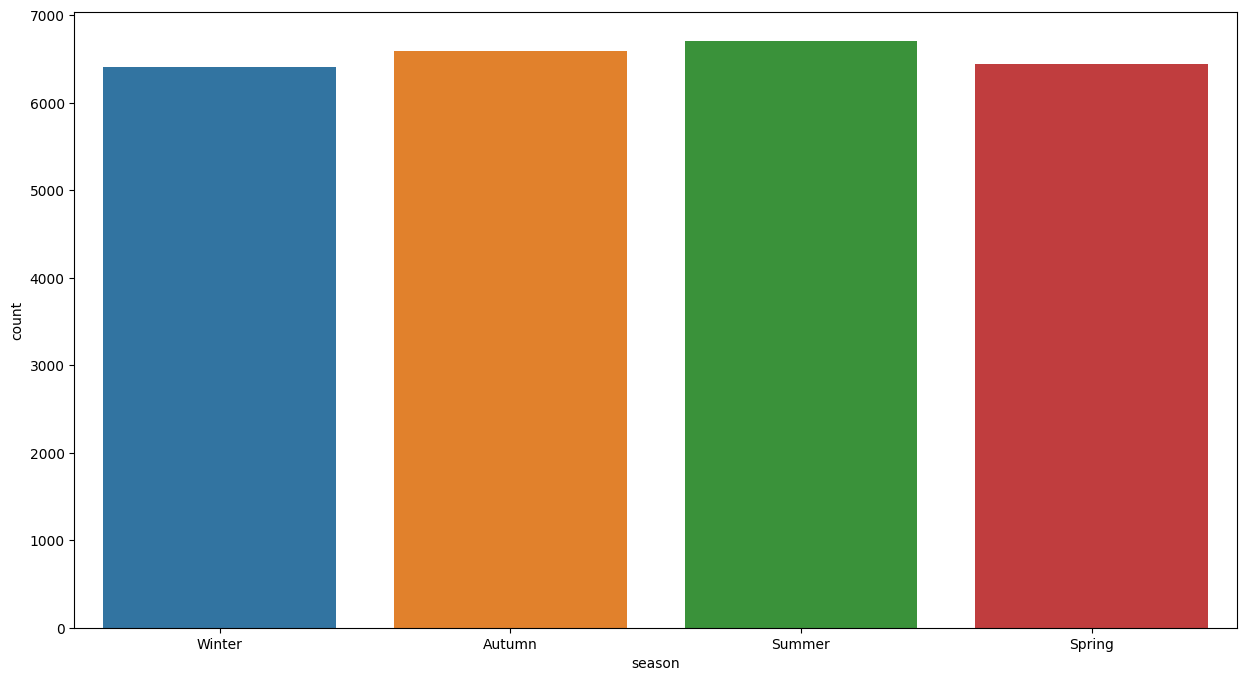

In [ ]:
sns.countplot(x='season',data=df_cat)

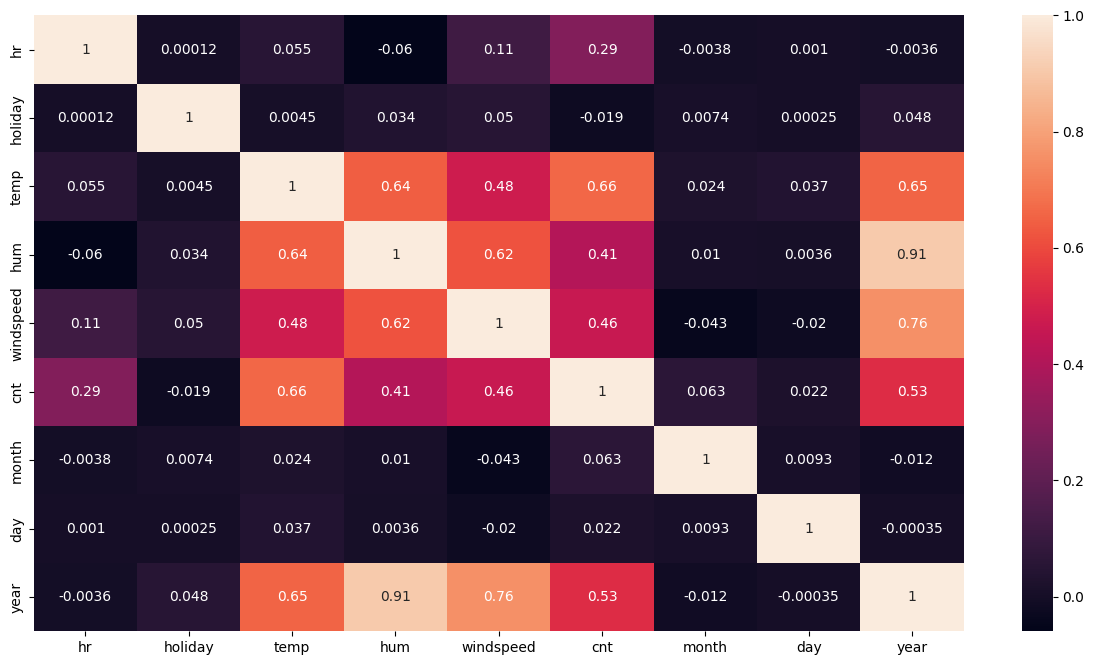

In [ ]:
sns.heatmap(df.corr(),annot = True,color = 'y')
plt.show()

## Variables Distribution

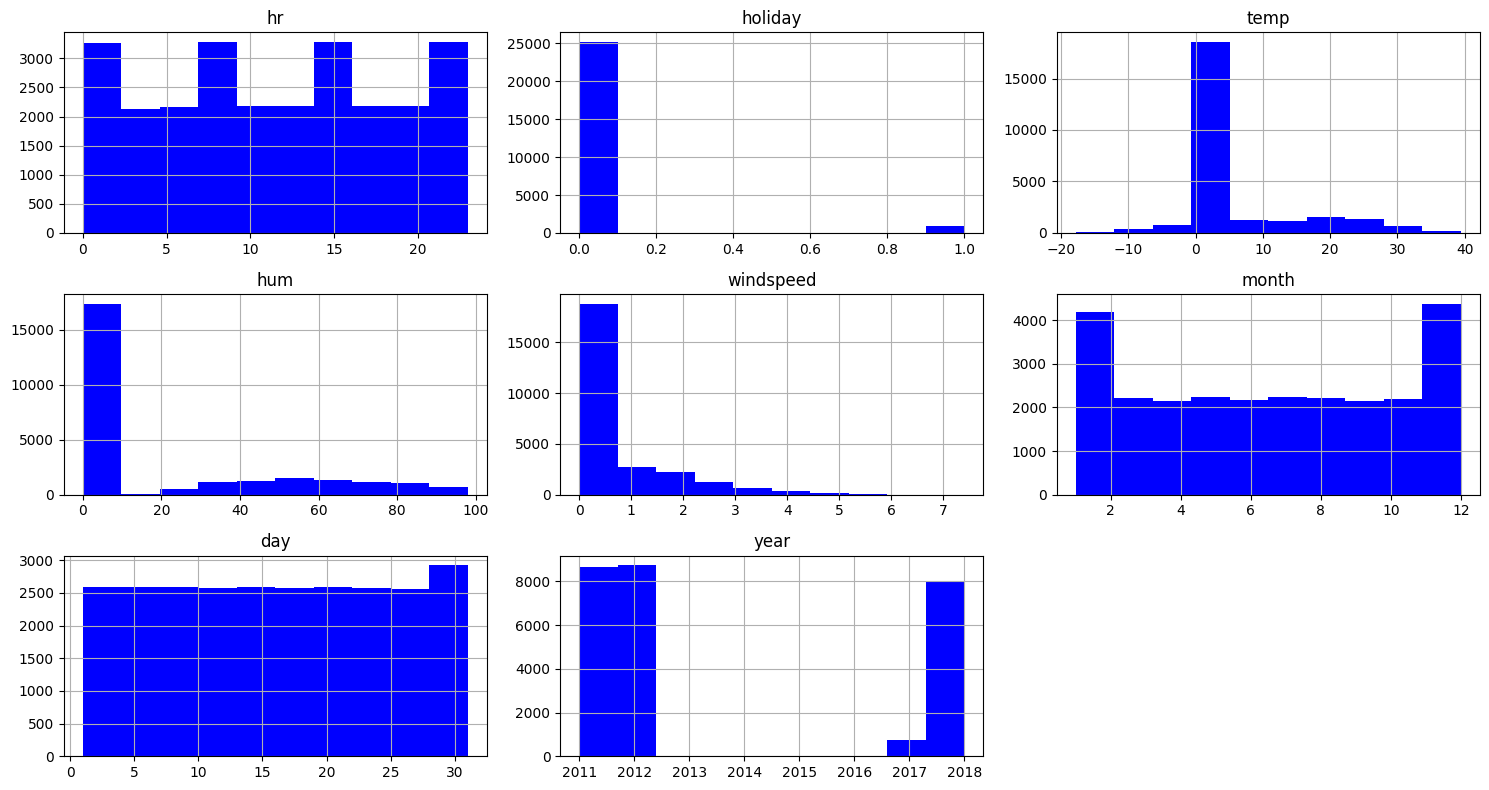

Skewness:


hr          -0.007103
holiday      5.008592
temp         1.625359
hum          1.159319
windspeed    1.990985
month       -0.009671
day          0.010786
year         0.650560
dtype: float64

In [ ]:
df.drop('cnt', axis = 1).hist(color = "b")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()
print('Skewness:')

df.drop('cnt', axis = 1).skew()

## Missing Values

In [ ]:
Total = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
season,0,0.000000
hr,0,0.000000
holiday,0,0.000000
workingday,0,0.000000
temp,0,0.000000
hum,0,0.000000
windspeed,0,0.000000
cnt,0,0.000000
month,0,0.000000
day,0,0.000000


## Ploting variable Based on boxplots

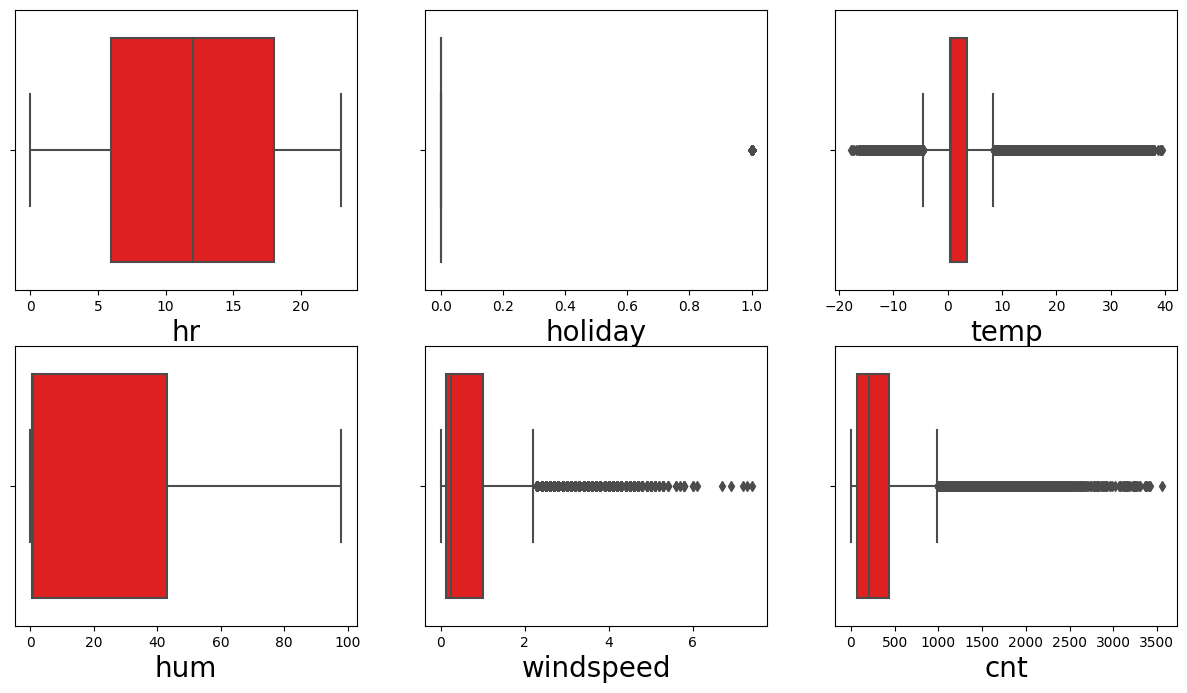

In [ ]:
df_num = df.select_dtypes(include=[np.number])
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], ax=subplot,color='red', orient = "h",whis=1.5) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)

In [ ]:
lower = df_num.temp.quantile(0.25)
upper = df_num.temp.quantile(0.75)

IQR = upper - lower

# print the IQR
print(IQR)
df_num = df_num[~((df_num.temp < (lower - 1.5 * IQR)) |(df_num.temp > (upper + 1.5 * IQR)))]

3.24


In [ ]:
lower = df_num.hum.quantile(0.25)

upper = df_num.hum.quantile(0.75)
IQR = upper - lower

print(IQR)
df_num = df_num[~((df_num.hum < (lower - 1.5 * IQR)) |(df_num.hum > (upper + 1.5 * IQR)))]

0.37


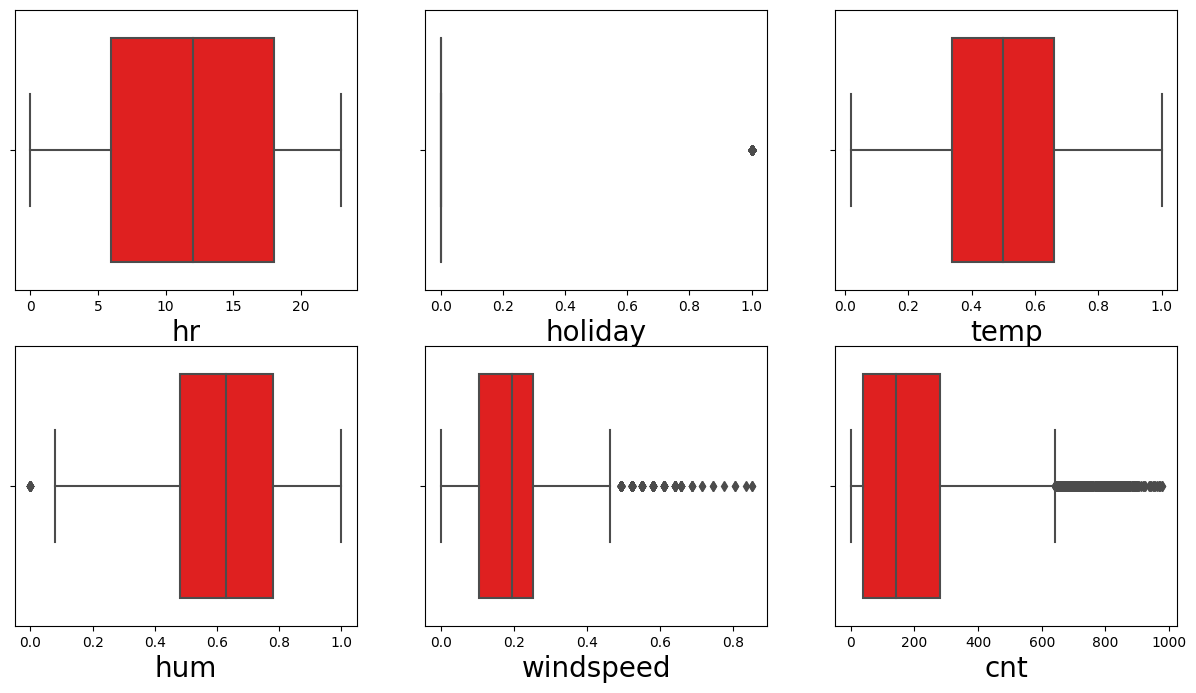

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], ax=subplot,color='red', orient = "h",whis=1.5 )
    z.set_xlabel(variable, fontsize = 20)

# Mock Encode

In [ ]:
df_target = df['cnt']
df_feature = df.drop(['cnt','holiday'], axis = 1)
df_num = df_feature.select_dtypes(include = [np.number])
df_num.head()

,hr,temp,hum,windspeed,month,day,year
0,0,0.240000,0.810000,0.000000,1,1,2011
1,1,0.220000,0.800000,0.000000,1,1,2011
2,2,0.220000,0.800000,0.000000,1,1,2011
3,3,0.240000,0.750000,0.000000,1,1,2011
4,4,0.240000,0.750000,0.000000,1,1,2011


In [ ]:
df_cat = df_feature.select_dtypes(include = [np.object])
df_cat.columns
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

## Data Scaling And Train_Test Spliting
Before employing diverse classification methods to forecast student admission outcomes, let's divide the dataset into training and testing sets.

In [ ]:
target = df['holiday']
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [ ]:
X = pd.concat([df_num, dummy_var], axis = 1)
#X.drop("Sold",axis = 1,inplace = True)
X.head()

,hr,temp,hum,windspeed,month,day,year,season_Spring,season_Summer,season_Winter,workingday_Yes
0,0,0.240000,0.810000,0.000000,1,1,2011,0,0,1,0
1,1,0.220000,0.800000,0.000000,1,1,2011,0,0,1,0
2,2,0.220000,0.800000,0.000000,1,1,2011,0,0,1,0
3,3,0.240000,0.750000,0.000000,1,1,2011,0,0,1,0
4,4,0.240000,0.750000,0.000000,1,1,2011,0,0,1,0


In [ ]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 10, test_size = 0.2)

y_train = np.round(y_train).astype(int)
y_test = np.round(y_test).astype(int)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (20911, 12)
y_train (20911,)
X_test (5228, 12)
y_test (5228,)


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_data_nlv = data1.drop(columns=['RegionID','RegionType','StateName', 'SizeRank'])
train_data_nlv_x = data1[[]]
train_data_nlv_y= data1['']

In [ ]:
train_data_nlv_x_train, train_data_nlv_x_test, train_data_nlv_y_train, train_data_nlv_y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=12)

Mosquito Index as Latent Variable

In [ ]:
train_data_lv1 = data1.drop(columns=['RegionID','RegionType','StateName', 'SizeRank'])
train_data_lv1_x = train_data_lv1[['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31','2009-12-31','2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31','2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', 'NatWalkInd']].fillna(train_data_lv1['NatWalkInd'].mean())
train_data_lv1_y= train_data_lv1['2022-12-31'].fillna(method="ffill")

In [ ]:
train_data_lv1_x_train, train_data_lv1_x_test, train_data_lv1_y_train, train_data_lv1_y_test = train_test_split(train_data_lv1_x, train_data_lv1_y, test_size=0.25, random_state=12)

In [ ]:
train_data_lv12_x_train, train_data_lv12_x_test, train_data_lv12_y_train, train_data_lv12_y_test = train_test_split(train_data_lv12_x, train_data_lv12_y, test_size=0.25, random_state=12)

# Importing another dataset for Latent Variables

In [69]:
datasetUrl3 = 'https://drive.google.com/file/d/1kJNMX2hyURPLJcG-9bg-1XMi9j5UcnH2'
datasetUrl3 ='https://drive.google.com/uc?id=' + datasetUrl3.split('/')[-1]
data3 = pd.read_csv(datasetUrl3, encoding_errors='ignore')
data3.head(10)

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.400000,0.000000,18.800000,12.200000,26.000000
1,2016-05-02,273.500000,16.500000,21.100000,16.500000,28.400000
2,2016-05-03,304.000000,27.000000,12.900000,8.900000,17.600000
3,2016-05-04,256.200000,0.000000,15.700000,10.200000,20.600000
4,2016-05-05,243.800000,7.500000,18.900000,10.200000,26.900000
5,2016-05-06,248.500000,9.500000,16.300000,13.000000,18.600000
6,2016-05-07,243.200000,0.000000,16.500000,10.700000,22.600000
7,2016-05-08,249.000000,0.000000,19.400000,11.600000,26.800000
8,2016-05-09,249.600000,0.000000,20.200000,16.300000,25.400000
9,2016-05-10,240.800000,13.500000,14.500000,12.500000,18.100000


In [70]:
data3['date'] = pd.to_datetime(data3['date'], format='%Y-%m-%d')

In [71]:
data3['date'].head()

0   2016-05-01
1   2016-05-02
2   2016-05-03
3   2016-05-04
4   2016-05-05
Name: date, dtype: datetime64[ns]

In [72]:
data3['date'].nunique()

1295

### Mapping Latent Variables

In [73]:
from functools import reduce

len(list(reduce(set.intersection, map(set, [data2.Date, data3.date]))))


334

In [74]:
data_mapper = {k: v for k, v in zip(data3['date'],data3['mosquito_Indicator'])}

In [75]:
data2['mosquito_Indicator'] = data2['Date'].map(data_mapper)

In [76]:
data2.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mosquito_Indicator
0,2017-12-01,254,0,-5.200000,37,2.200000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,5.500000
1,2017-12-01,204,1,-5.500000,38,0.800000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,5.500000
2,2017-12-01,173,2,-6.000000,39,1.000000,2000,-17.700000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,5.500000
3,2017-12-01,107,3,-6.200000,40,0.900000,2000,-17.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,5.500000
4,2017-12-01,78,4,-6.000000,36,2.300000,2000,-18.600000,0.000000,0.000000,0.000000,Winter,No Holiday,Yes,5.500000


In [77]:
data2['Holiday'].replace(('Holiday', 'No Holiday'), (1, 0), inplace=True)
train_data = data2
train_data_x = train_data.loc[:, train_data.columns != 'Rented Bike Count']
train_data_y = train_data['Rented Bike Count']

In [78]:
train_data_x_train, train_data_x_test, train_data_y_train, train_data_y_test = train_test_split(train_data_x, train_data_y, test_size=0.25, random_state=12)

# Muller Loop

### Importing Libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
names = [
    "Linear Regression",
    "MLP Regressor",
    "RandomForest Regressor",
    "Gradient Boosting Regressor",
    "KNeighbors Regressor"
         ]

classifiers = [
    LinearRegression(),
    MLPRegressor(random_state=1, max_iter=500),
    RandomForestRegressor(max_depth=4, random_state=1),
    GradientBoostingRegressor(random_state=1),
    KNeighborsRegressor(n_neighbors=2)
    ]

### Muller Loop Function

In [62]:
def muller_loop(x_train, x_test, y_train, y_test):
  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  metrics_df = pd.DataFrame({
      'Classifier': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': []
      })
  for name, clf in zip(names, classifiers):
      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_test)
      score = 100.0 * clf.score(x_test, y_test)
      mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
      mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
      r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)

      new_row = pd.DataFrame({
      'Classifier': name,
      'MSE' : mean_absolute_error,
      'MAE': mean_squared_error,
      'RSquared': r_squared,
      'Test Accuracy': score}, index=[0])
      metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

      print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
  return metrics_df

# Metrics

### Without Latent Variables

In [ ]:
df_x_train = df_x_train.drop('Date', axis = 1)


In [87]:
df_x_train = df_x_train.drop('Seasons', axis = 1)

In [90]:
df_x_train = df_x_train.drop('Holiday', axis = 1)

In [93]:
df_x_train = df_x_train.drop('Functioning Day', axis = 1)

In [88]:
df_x_test = df_x_test.drop('Seasons', axis = 1)

In [94]:
df_x_test = df_x_test.drop('Functioning Day', axis = 1)

In [91]:
df_x_test = df_x_test.drop('Holiday', axis = 1)

In [85]:
df_x_test = df_x_test.drop('Date', axis = 1)

In [ ]:
non_latent_metrics_df = muller_loop(df_x_train, df_x_test, df_y_train, df_y_test)
non_latent_metrics_df

Classifier = Linear Regression, Score (test, accuracy) = 46.72,


### With Latent Variables

In [ ]:
met_metrics_df = muller_loop(train_data_x_train, train_data_x_test, train_data_y_train, train_data_y_test)
met_metrics_df

# Multi Layer Perceptron using Keras

### Importing essential libraries for Neural Network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

### Model Building and Compilation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data_lv12_x, train_data_lv12_y, test_size=0.25, random_state=12)

# define the keras model
model = Sequential()
model.add(Flatten(input_shape=(24,))),
model.add(Dense(12, input_shape=(24,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=10)

# evaluate the keras model
_ , accuracy = model.evaluate(X_train, y_train)

print('Accuracy: %.2f' % (accuracy*100))
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5).astype(int)

# for i in X_train.columns:
# 	print('%s => %d (expected %d)' % (X_train[i].tolist(), predictions[i], y_test[i]))